In [58]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 3.1.1 a

C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


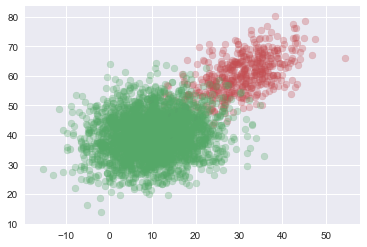

In [59]:
#generate two gaussian distributions all you need to do is set parameter here
mean = [30, 60]
cov = [[50, 30], [30, 50]]  # covariance
x, y = np.random.multivariate_normal(mean, cov, 500).T
plt.scatter(x, y, c = 'r', alpha = 0.3)
x1, y1= x, y

mean = [10, 40]
cov = [[50, 10], [0, 50]]  # covariance
x, y= np.random.multivariate_normal(mean, cov, 3000).T
x2, y2 = x, y
plt.scatter(x, y, c = 'g', alpha = 0.3)

(array([  2.,   3.,   0.,   2.,   0.,   3.,   7.,   7.,   8.,   4.,  20.,
         14.,  38.,  40.,  34.,  62.,  74.,  62.,  92., 108., 127., 134.,
        160., 155., 161., 157., 157., 151., 172., 144., 138., 122., 103.,
        113.,  86.,  73.,  73.,  47.,  39.,  21.,  22.,  15.,  15.,   8.,
          7.,   7.,   4.,   1.,   0.,   8.]),
 array([ 15.82001948,  17.90607663,  19.99213378,  22.07819093,
         24.16424808,  26.25030523,  28.33636238,  30.42241953,
         32.50847668,  34.59453383,  36.68059098,  38.76664813,
         40.85270528,  42.93876243,  45.02481959,  47.11087674,
         49.19693389,  51.28299104,  53.36904819,  55.45510534,
         57.54116249,  59.62721964,  61.71327679,  63.79933394,
         65.88539109,  67.97144824,  70.05750539,  72.14356254,
         74.22961969,  76.31567684,  78.40173399,  80.48779114,
         82.5738483 ,  84.65990545,  86.7459626 ,  88.83201975,
         90.9180769 ,  93.00413405,  95.0901912 ,  97.17624835,
         99.262305

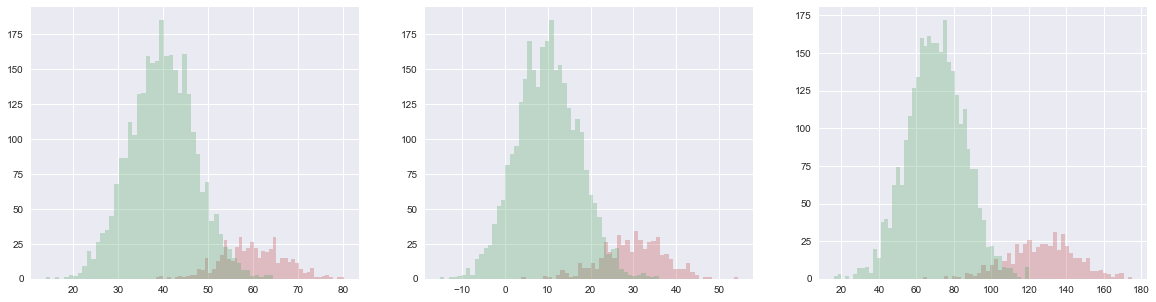

In [60]:
# project two ditributions
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)
# w = (0 1)^T
ax[0].hist(y1, bins = 50,color = 'r', alpha = 0.3)
ax[0].hist(y2, bins = 50,color = 'g', alpha = 0.3)
# w = (1 0)^T
ax[1].hist(x1, bins = 50,color = 'r', alpha = 0.3)
ax[1].hist(x2, bins = 50,color = 'g', alpha = 0.3)
# w = (cos(pi/4) sin(pi/4))^T, in another word projection line is y = x
w = math.sqrt(2)
ax[2].hist((x1 + y1)*w, bins = 50, color = 'r', alpha = 0.3)
ax[2].hist((x2 + y2)*w, bins = 50, color = 'g', alpha = 0.3)

### 3.1.1  b

In [61]:
# define functions
def rotate(w1, w2, theta):
    w1_theta = math.cos(theta)*w1 - math.sin(theta)*w2
    w2_theta = math.sin(theta)*w1 + math.cos(theta)*w2
    w = np.mat([w1_theta, w2_theta]).T
    #print ('w is:', w)
    return w

def project_vector(w, x, y, n):
    x_project = []
    
    for i in range(n):
        #print (i)
        xi = x[i]
        yi = y[i]
        new_point = np.asarray(np.mat([xi, yi])*w*w.T)
        New_point = list(new_point)
        #print('newpoint is ',new_point, type(New_point))
        xn = float(new_point[:,0])
        yn = float(new_point[:,1])
        x_project.append(xn + yn)  #revised
    return x_project

def mu_sigma(y, n):
    mu = np.sum(y)/n
    sigma = np.sum((y - mu)**2)/n
    return mu, sigma

def fisher_ratio(mu_a, sigma_a, mu_b, sigma_b, na, nb):
    numerator = (mu_a - mu_b)**2
    denominator = (na/(na + nb))*sigma_a + (nb/(na +nb))*sigma_b
    F = numerator/denominator
    return F

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
maximum fisher ratio is:  13.014109049989424  when theat equals to: [0.80733666]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Text(0.5,1,'Fisher Ratio')

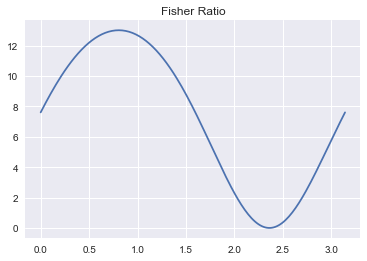

In [62]:
# I define w(0) = [1, 0]^T here
theta = np.linspace(0.,math.pi,180)
w1 = 1 
w2 = 0
F = []
na = len(x1)
nb = len(x2)

for i,theta_i in enumerate(theta):   
    w = rotate(w1, w2,theta_i)    
    x1_project = project_vector(w, x1, y1, na)
    x2_project = project_vector(w, x2, y2, nb)
    
    mu_a, sigma_a = mu_sigma(x1_project, na)
    mu_b, sigma_b = mu_sigma(x2_project, nb)
    F.append(fisher_ratio(mu_a, sigma_a,mu_b, sigma_b, na, nb))
    
#     print(w,'theta is:',theta_i)
#     print('mu_a is: ', mu_a, 'sigma_a is:', sigma_a)
#     print('mu_b is: ', mu_b, 'sigma_b is:', sigma_b)
#     print('fisher ratio is:', F[i])
#     print('---------------------------------------------------')

F_max = np.max(F)
place = np.where(F == np.max(F))
Theta = theta[place]
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('maximum fisher ratio is: ', F_max, ' when theat equals to:', Theta)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
plt.plot(theta, F)
plt.title('Fisher Ratio')


### 3.1.2 a

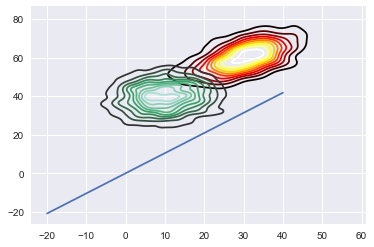

In [63]:
import seaborn as sns
#sns.set()
sns.set(color_codes=True)
sns.kdeplot(x1, y1,cmap='hot')
sns.kdeplot(x2, y2)
x_line = np.linspace(-20,40,600)
y_line = math.tan(Theta)*x_line
plt.plot(x_line,y_line)

### 3.1.2  b

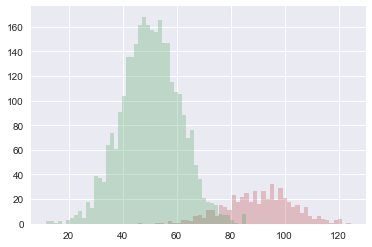

In [85]:
#use w from above, plot histogram of project 
w = rotate(w1, w2, Theta)
x1_project = project_vector(w, x1, y1, na)
x2_project = project_vector(w, x2, y2, nb)
hist1 = plt.hist(x1_project, bins = 50,color = 'r', alpha = 0.3)
hist2 = plt.hist(x2_project, bins = 50,color = 'g', alpha = 0.3)

125 11


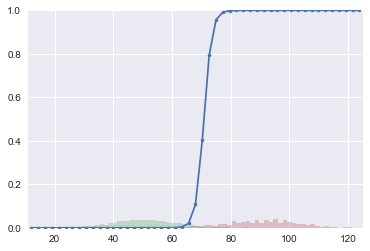

In [90]:

hist1 = plt.hist(x1_project, bins = 50, density = 1, color = 'r', alpha = 0.3)
hist2 = plt.hist(x2_project, bins = 50, density = 1, color = 'g', alpha = 0.3)


x_value = np.append(hist1[1], hist2[1], axis = 0)
x_max = int(np.max(x_value)) + 1
x_min = int(np.min(x_value))
print(x_max,x_min)

# take log ( ratio of probabilities of (y vs not-y) )
def logratio(a, b, eps=1e-14):  
    a=a+eps # to prevent taking logs of 0 or infinity
    b=b+eps # to prevent taking logs of 0 or infinity
    return np.log(a/b)

def sigmoid(x):
    return 1/(1+np.exp(-x))

binedge = np.linspace(x_min, x_max, 50) 
mid = np.mean((binedge[1:]-binedge[:-1])/2) 
x_grid = binedge[:-1] + mid

x1hist = np.histogram(x1_project, bins=binedge, density="True")
x2hist = np.histogram(x2_project, bins=binedge, density="True")
x1_hist = x1hist[0]
x2_hist = x2hist[0]

# print('x1_hist', x1_hist, 'x_grid', x_grid)
# print(x1hist[1],x2hist[1])
# print(binedge)


lodds=logratio(x1_hist, x2_hist, 1e-16) + \
        logratio(len(x1_project), len(x2_project))
lrfit=np.polyfit(x_grid, lodds, deg=1) # straight line fit

axes = plt.gca()
axes.set_xlim([x_min,x_max])
axes.set_ylim([0,1])
plt.plot(x_grid,sigmoid(lrfit[0]*x_grid+lrfit[1]),'b.-')


In [84]:
#print(len(x_grid),len(lodds))


### 3.1.2 c

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
maximum unbalanced fisher ratio is:  5.853183335390445  when theat equals to: [0.80733666]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Text(0.5,1,'Fisher Ratio')

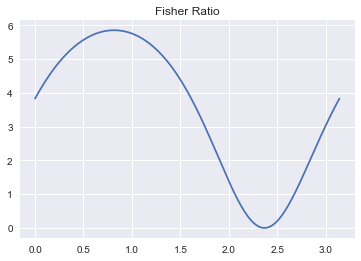

In [41]:
def unbalanced_fisher_ratio(mu_a, sigma_a, mu_b, sigma_b):
    numerator = (mu_a - mu_b)**2
    denominator = sigma_a + sigma_b
    F_unbalanced = numerator/denominator
    return F_unbalanced
# repeat what we`ve done in 3.1 b

theta = np.linspace(0.,math.pi,180)
w1 = 1 
w2 = 0
F_unbalanced = []

for i,theta_i in enumerate(theta):   
    w = rotate(w1, w2,theta_i) 
    x1_project = project_vector(w, x1, y1, na)
    x2_project = project_vector(w, x2, y2, nb)
    
    mu_a, sigma_a = mu_sigma(x1_project, na)
    mu_b, sigma_b = mu_sigma(x2_project, nb)
    F_unbalanced.append(unbalanced_fisher_ratio(mu_a, sigma_a,mu_b, sigma_b))
    
#     print(w,'theta is:',theta_i,'i is: ', i)
#     print('mu_a is: ', mu_a, 'sigma_a is:', sigma_a)
#     print('mu_b is: ', mu_b, 'sigma_b is:', sigma_b)
#     print('fisher ratio is:', F_unbalanced[i])
#     print('---------------------------------------------------')

F_max = np.max(F_unbalanced)
place = np.where(F_unbalanced == np.max(F_unbalanced))
Theta = theta[place]
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('maximum unbalanced fisher ratio is: ', F_max, ' when theat equals to:', Theta)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
plt.plot(theta, F_unbalanced)
plt.title('Fisher Ratio')

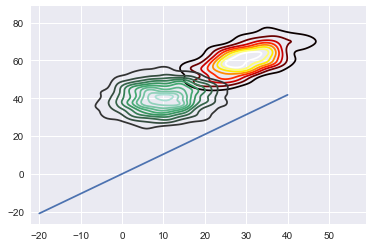

In [42]:
sns.set(color_codes=True)
sns.kdeplot(x1, y1,cmap='hot')
sns.kdeplot(x2, y2)
x_line = np.linspace(-20,40,600)
y_line = math.tan(Theta)*x_line
plt.plot(x_line,y_line)